# Monty Hall Problem using Simulation
## Carlos Hinrichsen
### June 4<sup>th</sup>, 2019

#### Monty Hall problem

Given below is the description of the problem.

Suppose you're on a game show and you're given the choice of three doors.

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly.

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. Imagine that you chose Door 1 and the host opens Door 3, which has a goat. He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice?

NOTES:

The player may initially choose any of the three doors (not just Door 1).
The host opens a different door revealing a goat (not necessarily Door 3).
The host gives the player a second choice between the two remaining unopened doors.
Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.

__To solve the problem, we will consider two strategies:__
* __Strategy 1:__ The player changes the door selection once the host opens its door
* __Strategy 2:__The player doesn't change the door selection once the host opens its door

Below it is shown a unique code that considers both strategies, and also a grapgh that ilustrates the probability of win once the number of iterations goes up. 

__The convergence of the probability of win in both cases could be reached around the iteration $500$, and it converges to the theoretical probability shown in the following link: https://en.wikipedia.org/wiki/Monty_Hall_problem.__ __In this case the Strategy 1 has a probability of win of $\frac{2}{3}=66.6\%$, and the Strategy 2 has a probability of win of $\frac{1}{3}=33.3\%$__

#### First we Import Required Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import random
import numpy as np

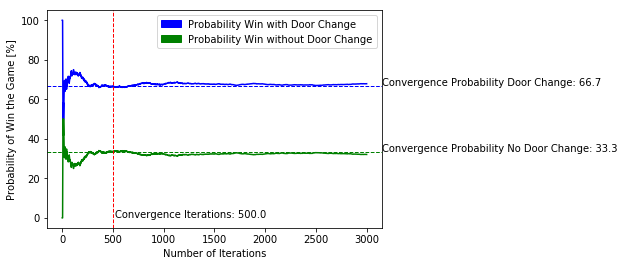

In [2]:
# For reproducibility, we set the initial seed
np.random.seed(1234)
# Of games played
it=3000
# Number of doors displayed
doors = [1,2,3]
# Auxiliar variables to use
c1=0
c2=0
A=[]
C1=[]
C2=[]
# We start the game by iteration
for M in range(1,it): 
    # We make a copy of the information of the doors
    doors1 = doors.copy()
    # We randomly choose the winner door
    wn = random.choice(doors1)
    # The player does the first selection of door 
    select1 = random.choice(doors1)
    # Now the host will open a door
    # If the player selected the winner door
    if wn==select1:
        # The host can't choose the player door
        doors1.remove(wn)
        # And the host will select randomly one of the remaining doors to show
        host = random.choice(doors1)
    # If the player selected the winner door
    else:
        # The host only can choose one of the remaining doors, so we remove the other doors
        doors1 = [e for e in doors1 if e not in (wn, select1)]
        # Here the host selects its door
        host = int(doors1[0])
    # Strategy 1: The participant will change its first selection
    # We make a copy of the information of the doors
    select2 = doors.copy()
    # We remove the door selected at the beginning, and of course the host door
    select2 = [e for e in select2 if e not in (select1,host)]
    # Here we already changed the selection
    select2 = int(select2[0])
    # If the new door selected is the winner, add a "1" to the number of winners computed using Strategy 1
    if select2 == wn:
        c1=c1+1
    # Otherwise, don't count (considering Strategy 1)
    else:
        c1=c1
    # Create a cumulated list with the number of iterations (by iteration)
    A.append(M)
    # Create a list with the proportion of winners cumulated using Strategy 1 (by iteration)
    C1.append(c1/M*100)
    
    # Strategy 2: The participant will not change its first selection (select 1)
    select3 = select1
    # If the selected door at the beginning is the winner, add a "1" to the number of winners computed using Strategy 2
    if select3 == wn:
        c2=c2+1
    # Otherwise, don't count (considering Strategy 2)
    else:
        c2=c2
    # Create a list with the proportion of winners cumulated using Strategy 2 (by iteration)
    C2.append(c2/M*100)

# Plotting the results 
plt.xlabel('Number of Iterations')
plt.ylabel('Probability of Win the Game [%]')
plt.plot(A,C1,'b',A,C2,'g')
plt.axhline(2/3*100, color='b', linestyle='dashed', linewidth=1)
plt.text(it*1.05, 2/3*100,'Convergence Probability Door Change: {:.1f}'.format(2/3*100))
plt.axhline(1/3*100, color='g', linestyle='dashed', linewidth=1)
plt.text(it*1.05, 1/3*100,'Convergence Probability No Door Change: {:.1f}'.format(1/3*100))
blue_patch = mpatches.Patch(color='b', label='Probability Win with Door Change')
green_patch = mpatches.Patch(color='g', label='Probability Win without Door Change')
plt.legend(handles=[blue_patch,green_patch])
plt.text(520, 0,'Convergence Iterations: {:.1f}'.format(500))
plt.axvline(500, color='r', linestyle='dashed', linewidth=1)

__It's easy to see that the Strategy 1 has a higher probability to win than Strategy 2, so the player should have to change the door selected!!!__

__Also the graph shows that doing several iterations of the game, around 500 the probabilities tend to converge, but for that it's prefered to perform a formal convergence test (beyond the present assignment).__